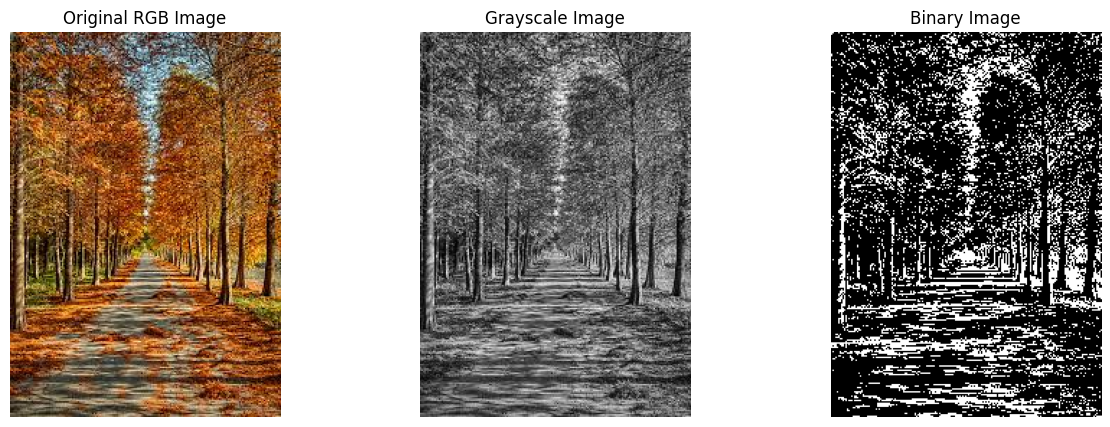

((268, 188, 3), 50384, 37583, 'img_3_gray.jpeg', 'img_3_binary.jpeg')

In [1]:
#Task - 1

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "img_3.jpeg"
image_bgr = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_bgr is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the file exists.")
    # You can also try to print the current working directory to verify the file location
    import os
    print(f"Current working directory: {os.getcwd()}")
    # Exit the script if the image loading failed to prevent further errors
    exit()

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Extract image size (height, width, channels)
height, width, channels = image_rgb.shape

# Calculate the number of pixels
total_pixels = height * width

# Convert RGB to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Convert Grayscale to Binary using thresholding
_, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Count black pixels in the binary image (black pixels have value 0)
black_pixel_count = np.sum(image_binary == 0)

# Save the processed images
gray_image_path = "img_3_gray.jpeg"
binary_image_path = "img_3_binary.jpeg"
cv2.imwrite(gray_image_path, image_gray)
cv2.imwrite(binary_image_path, image_binary)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original RGB Image")
axes[0].axis("off")

axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

axes[2].imshow(image_binary, cmap='gray')
axes[2].set_title("Binary Image")
axes[2].axis("off")

plt.show()

# Print extracted details
(height, width, channels), total_pixels, black_pixel_count, gray_image_path, binary_image_path


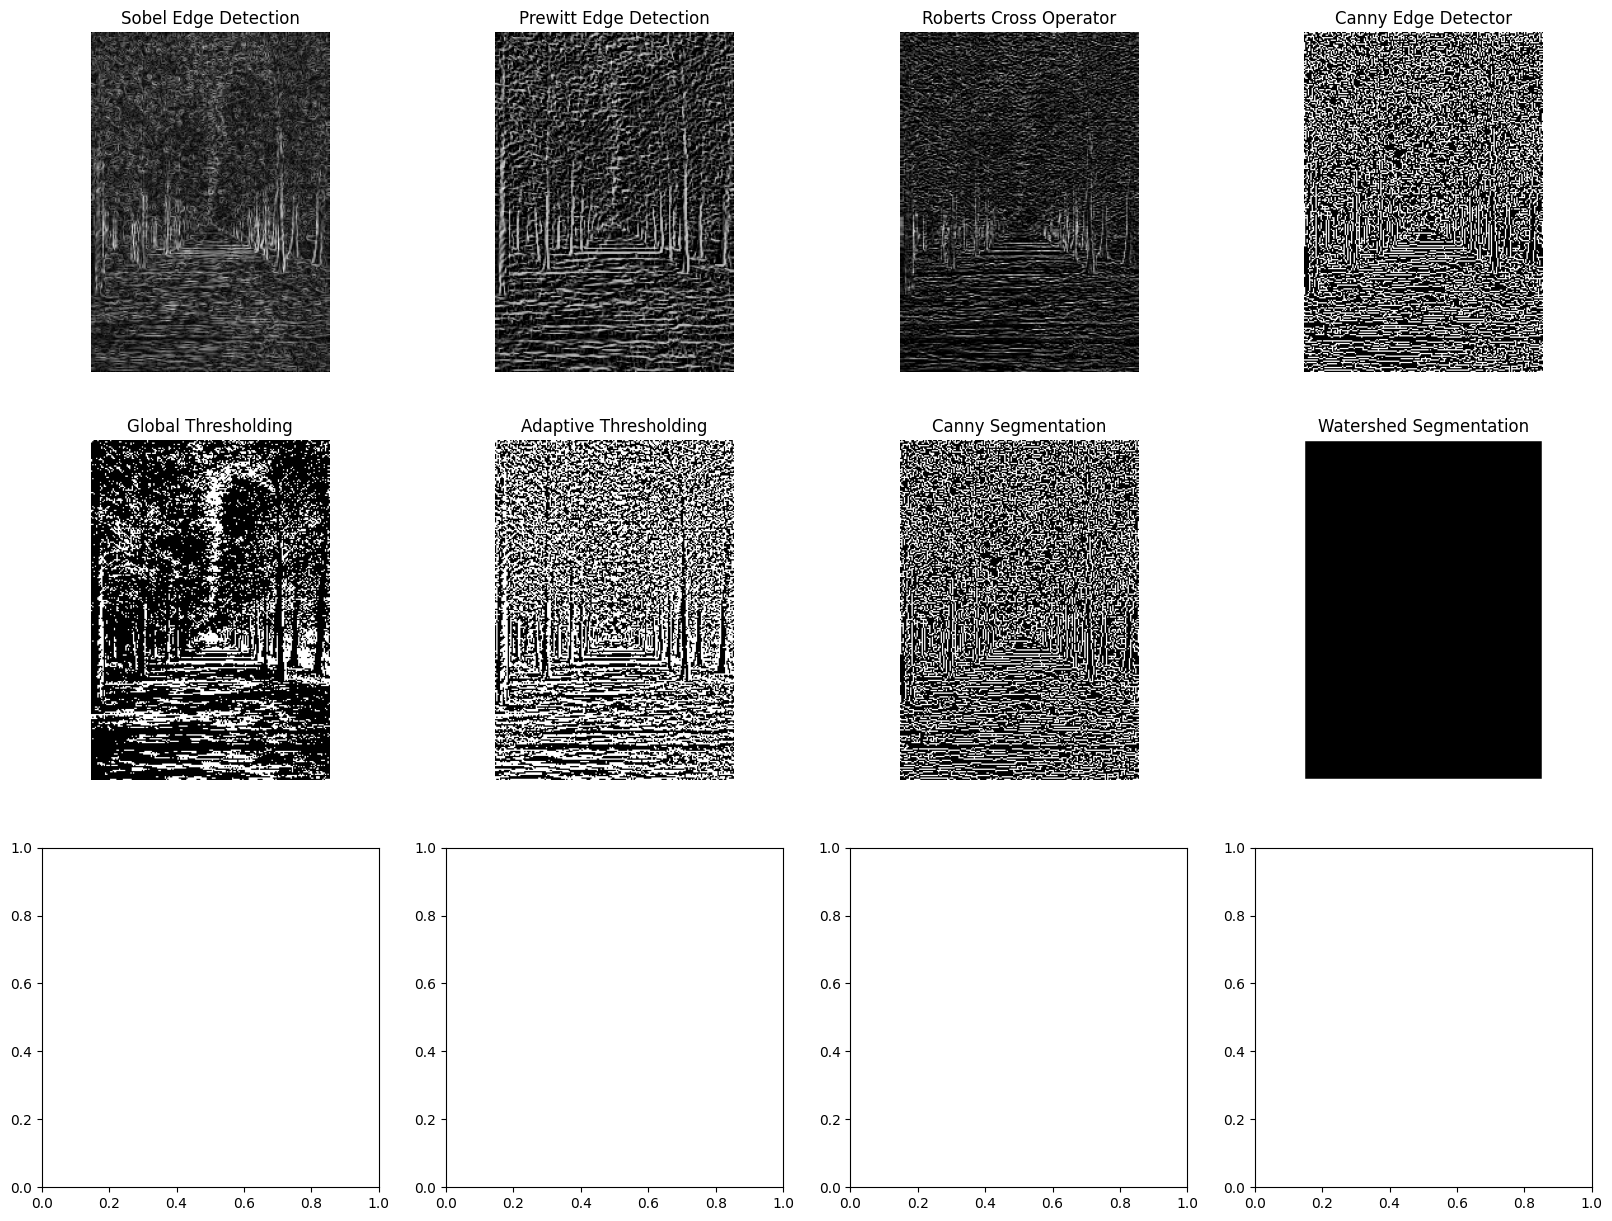

In [6]:
##Task - 2

# Load the grayscale image
image_gray = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)

# 1. EDGE DETECTION

# Sobel Operator (X and Y)
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)  # Detects vertical edges
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)  # Detects horizontal edges
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Combines both

# Prewitt Operator (X and Y)
prewitt_x = cv2.filter2D(image_gray, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))  # Vertical
prewitt_y = cv2.filter2D(image_gray, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))  # Horizontal
prewitt_combined = cv2.magnitude(prewitt_x.astype(np.float32), prewitt_y.astype(np.float32))

# Roberts Cross Operator
roberts_x = cv2.filter2D(image_gray, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(image_gray, -1, np.array([[0, 1], [-1, 0]]))
roberts_combined = cv2.magnitude(roberts_x.astype(np.float32), roberts_y.astype(np.float32))

# Canny Edge Detector
canny_edges = cv2.Canny(image_gray, 100, 200)

# 2. IMAGE SEGMENTATION

# Global Thresholding
_, global_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Edge Detection for Segmentation (Using Canny Edge Detector from earlier)
canny_segment = canny_edges.copy()

# Region-Based Segmentation (Watershed Algorithm)
# Convert grayscale to color for markers
image_color = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

# Create marker for watershed
_, markers = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
_, markers = cv2.connectedComponents(markers)
markers = markers + 1  # Add 1 to distinguish background

# Apply watershed
cv2.watershed(image_color, markers)
watershed_segment = np.where(markers == -1, 255, 0).astype(np.uint8)  # Extract boundaries

# Display Results
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

titles = [
    "Sobel Edge Detection", "Prewitt Edge Detection", "Roberts Cross Operator", "Canny Edge Detector",
    "Global Thresholding", "Adaptive Thresholding", "Canny Segmentation", "Watershed Segmentation"
]

images = [
    sobel_combined, prewitt_combined, roberts_combined, canny_edges,
    global_thresh, adaptive_thresh, canny_segment, watershed_segment
]

for i in range(len(images)):
    axes[i].imshow(images[i], cmap="gray")
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.show()
